### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 10
len(data)

403

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'02-27-2021'

### New cases in the World changed by day

### ARE WE BEATING COVID-19?

The World still has 36319749.0 active cases

In last 7 days:  [34106056. 34153983. 35841680. 35997449. 36149761. 36262431. 36319749.]


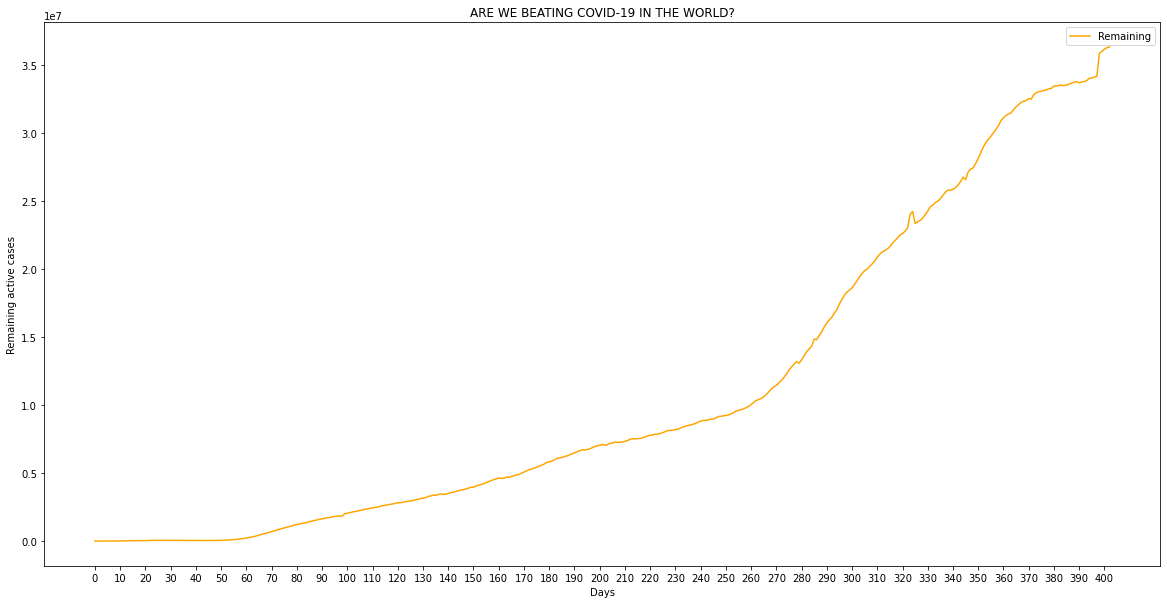

In [4]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])
print("In last 7 days: ", remaining_by_day[-7:])

In [5]:
total_confirmed_df = pd.DataFrame.from_dict(data=all_countries['Confirmed'])
total_fatal_df = pd.DataFrame.from_dict(data=all_countries['Deaths'])
total_recovered_df = pd.DataFrame.from_dict(data=all_countries['Recovered'])
total_remaining_df = total_confirmed_df-total_fatal_df-total_recovered_df
total_remaining_df.tail(1)

,"Korea, South",China,Hong Kong,Taiwan*,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
402,7376.0,485.0,0.0,28.0,3976.0,35471.0,32005.0,310.0,961.0,421.0,...,4048231.0,7293.0,841.0,0,6564.0,553.0,13765.0,203.0,3512.0,2005.0


In [6]:
daily_confirmed_sum = np.array([sum(total_confirmed_df.iloc[i]) for i in range(len(total_confirmed_df))])
daily_fatal_sum = np.array([sum(total_fatal_df.iloc[i]) for i in range(len(total_fatal_df))])
daily_recovered_sum = np.array([sum(total_recovered_df.iloc[i]) for i in range(len(total_recovered_df))])

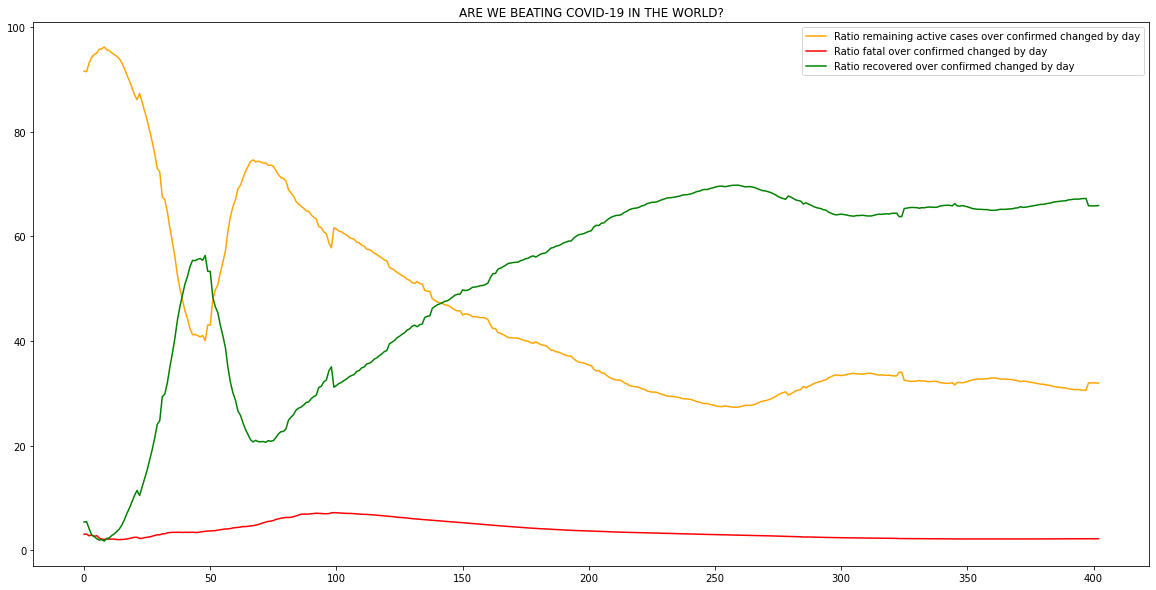

In [7]:
plt.plot(x_dat, ((daily_confirmed_sum-daily_recovered_sum-daily_fatal_sum)/daily_confirmed_sum)*100, color='orange', label='Ratio remaining active cases over confirmed changed by day')
plt.plot(x_dat, (daily_fatal_sum/daily_confirmed_sum)*100, color='red', label='Ratio fatal over confirmed changed by day')
plt.plot(x_dat, (daily_recovered_sum/daily_confirmed_sum)*100, color='green', label='Ratio recovered over confirmed changed by day')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid_ratio.jpg')

### Countries are beating COVID most

,402
MS Zaandam,0.0
Grenada,0.0
Vanuatu,0.0
Marshall Islands,0.0
Tajikistan,0.0
Hong Kong,0.0
Diamond Princess,0.0
Micronesia,0.0
Saint Kitts and Nevis,1.0
Samoa,1.0


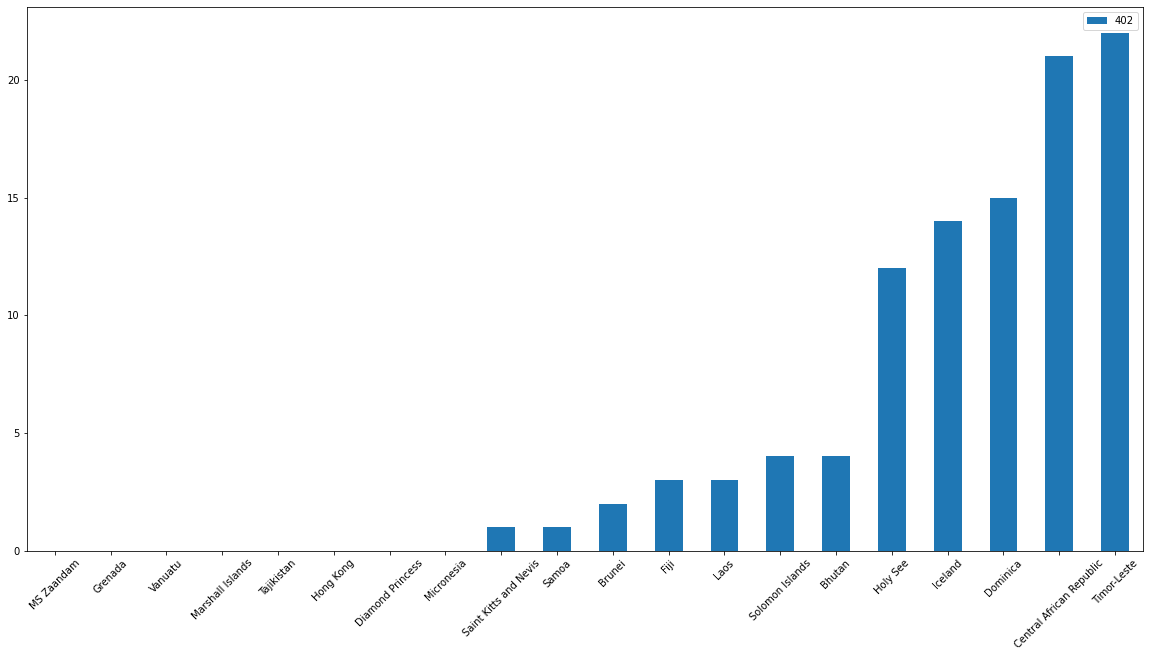

In [8]:
index = total_remaining_df.tail(1)
top_remaining = total_remaining_df.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

,MS Zaandam,Grenada,Vanuatu,Marshall Islands,Tajikistan,Hong Kong,Diamond Princess,Micronesia,Saint Kitts and Nevis,Samoa,Brunei,Fiji,Laos,Solomon Islands,Bhutan,Holy See,Iceland,Dominica,Central African Republic,Timor-Leste
0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0,0.0,2.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0,0.0,2.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0,0.0,5.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0,0.0,8.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,0.0,0,0,0.0,0.0,0.0,0,2.0,1,4.0,0.0,3.0,4.0,4.0,12.0,17.0,15.0,18.0,25.0
399,0.0,0.0,0,0,0.0,0.0,0.0,0,2.0,1,4.0,1.0,3.0,4.0,4.0,12.0,16.0,15.0,21.0,21.0
400,0.0,0.0,0,0,0.0,0.0,0.0,0,1.0,1,4.0,1.0,3.0,4.0,4.0,12.0,15.0,15.0,21.0,21.0
401,0.0,0.0,0,0,0.0,0.0,0.0,0,1.0,1,4.0,3.0,3.0,4.0,4.0,12.0,14.0,15.0,21.0,21.0


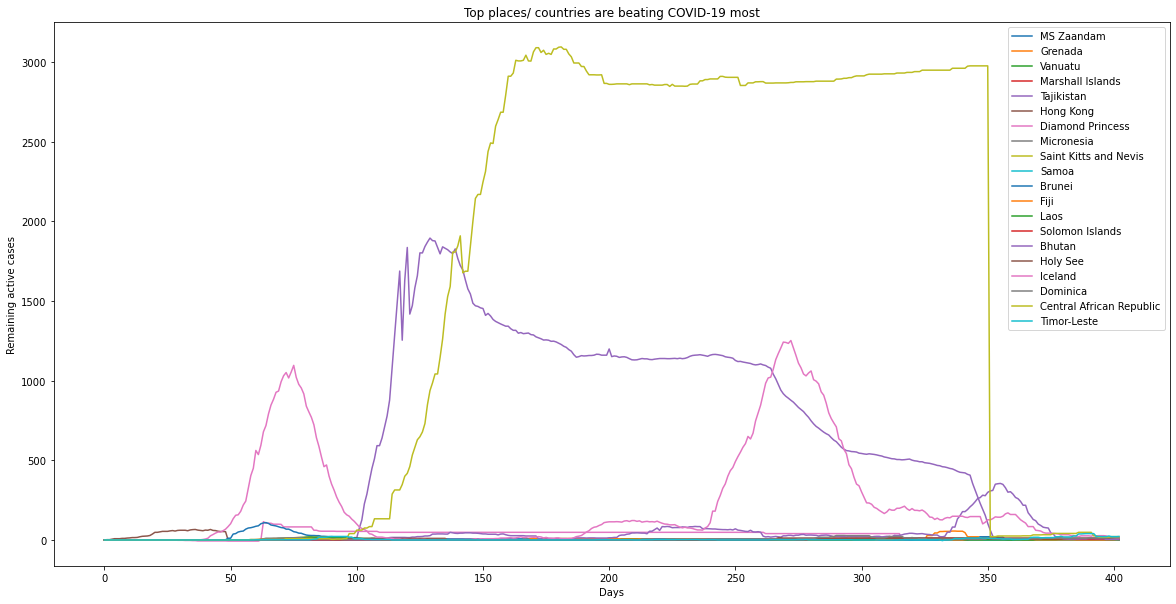

In [9]:
total_remaining_df[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 most")
total_remaining_df[top_remaining.index]

### Countries are beating COVID least

,402
US,17346171.0
United Kingdom,4048231.0
France,3399873.0
Spain,2969035.0
Netherlands,1068829.0
Brazil,891563.0
Belgium,747362.0
Sweden,644483.0
Serbia,452021.0
Italy,411966.0


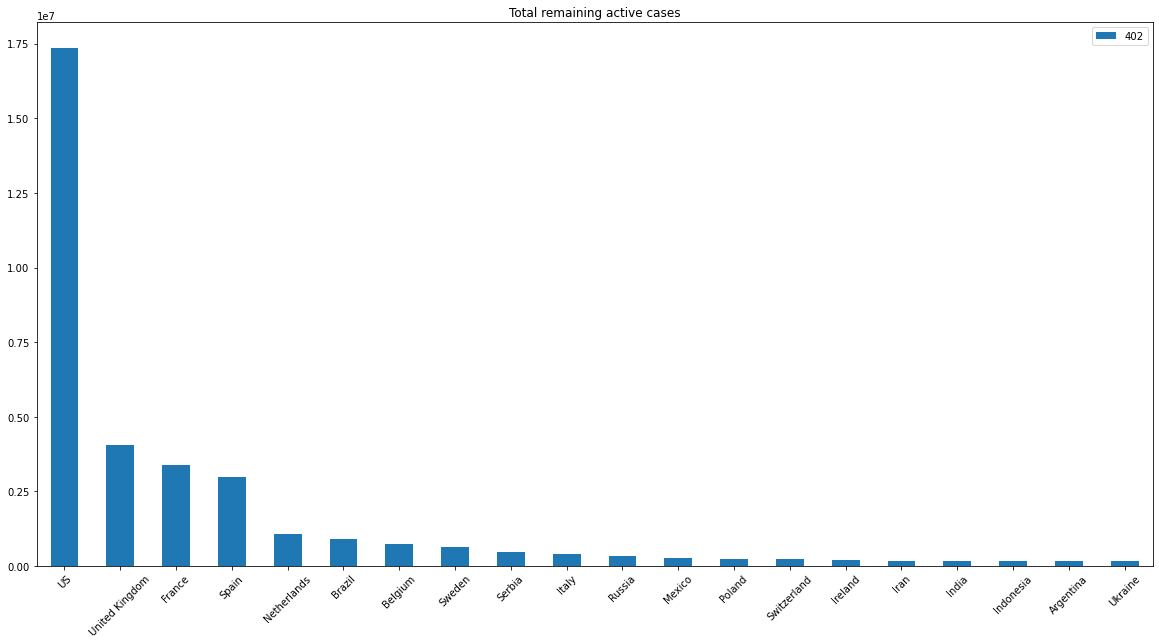

In [10]:
bottom_remaining = total_remaining_df.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.title("Total remaining active cases")
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'Top places/ countries are beating COVID-19 least')

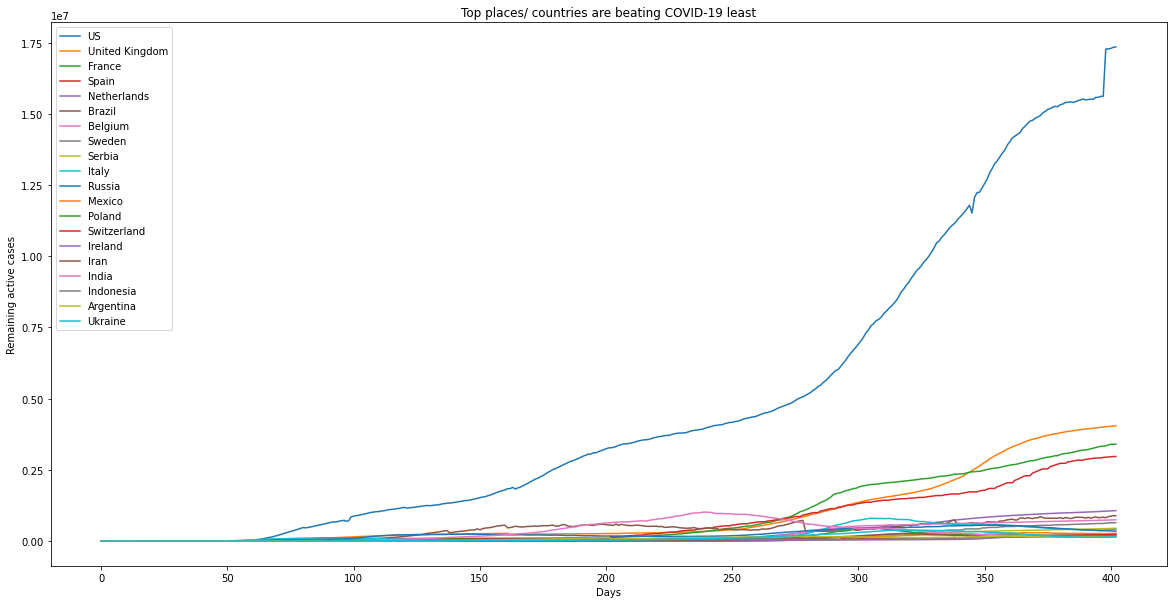

In [11]:
total_remaining_df[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("Top places/ countries are beating COVID-19 least")

In [12]:
# Test
len(totalconfirmed_by_day) == len(totalrecovered_by_day) == len(totalfatalities_by_day), total_confirmed_df['Vietnam'].tail(1) -total_fatal_df['Vietnam'].tail(1)-total_recovered_df['Vietnam'].tail(1) == total_remaining_df['Vietnam'].tail(1), total_remaining_df['Vietnam'].tail(1)

(True,
 402    True
 Name: Vietnam, dtype: bool,
 402    553.0
 Name: Vietnam, dtype: float64)